# Working With MNE and BIDS
The combination of mne and mne-bids makes working with EEG data in python very straightforward. This notebook will walk you through a simple example where we explore a dataset in BIDS format, manipulate and plot the raw data, and then plot a topographical (fake) summary data

In [1]:
# basic imports
import numpy as np
from pathlib import Path

import mne
from mne_bids import BIDSPath, read_raw_bids, make_report, print_dir_tree

## 1. Set up variables that point mne-bids to your dataset

In [2]:
# specify your root directory for your bids data. This should have the sourcedata, subject folders, and derivatives directories 
root = Path('../data/')

# Set the BIDS entities for the dataset you would like to run
subject = "101"
session = "RO1"
task = "ica"
acq = "eeg"
run = "01"
datatype = "eeg"

In [3]:
# Observe the contents of the BIDS dataset
print_dir_tree(root)

|data\
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-101\
|------ ses-RO1\
|--------- sub-101_ses-RO1_scans.tsv
|--------- eeg\
|------------ sub-101_ses-RO1_acq-eeg_coordsystem.json
|------------ sub-101_ses-RO1_acq-eeg_electrodes.tsv
|------------ sub-101_ses-RO1_task-ica_acq-eeg_run-01_channels.tsv
|------------ sub-101_ses-RO1_task-ica_acq-eeg_run-01_eeg.eeg
|------------ sub-101_ses-RO1_task-ica_acq-eeg_run-01_eeg.json
|------------ sub-101_ses-RO1_task-ica_acq-eeg_run-01_eeg.vhdr
|------------ sub-101_ses-RO1_task-ica_acq-eeg_run-01_eeg.vmrk


In [4]:
# we can also summarize the dataset
make_report(root, verbose=False)

Summarizing participants.tsv ..\data\participants.tsv...


'This dataset was created with BIDS version 1.4.0 by Please cite MNE-BIDS in your\npublication before removing this (citations in README). This report was\ngenerated with MNE-BIDS (https://doi.org/10.21105/joss.01896). The dataset\nconsists of 1 participants (sex were all unknown; handedness were all unknown;\nages all unknown)and 1 recording sessions: RO1. Data was recorded using a EEG\nsystem sampled at 200.0 Hz with line noise at 60 Hz. There was 1 scan in total.\nRecording durations ranged from 900.0 to 900.0 seconds (mean = 900.0, std =\n0.0), for a total of 900.0 seconds of data recorded over all scans. For each\ndataset, there were on average 19.0 (std = 0.0) recording channels per scan, out\nof which 19.0 (std = 0.0) were used in analysis (0.0 +/- 0.0 were removed from\nanalysis).'

In [5]:
# The BIDSPath object has a lot of great functionality to make things more convenient
bids_path = BIDSPath(subject=subject, session=session, task=task,
                     acquisition=acq, run=run, datatype=datatype, root=root,
                     suffix='eeg', extension='.vhdr')
bids_path

BIDSPath(
root: ..\data
datatype: eeg
basename: sub-101_ses-RO1_task-ica_acq-eeg_run-01_eeg.vhdr)

## 2. Load in the data

In [6]:
# Now we can read in the raw eegdata. This function takes many different eeg file formats, as specified in the BIDSPath above
# If you look at the print statements you can understand how the vhdr format functions
raw = read_raw_bids(bids_path)

Extracting parameters from ..\data\sub-101\ses-RO1\eeg\sub-101_ses-RO1_task-ica_acq-eeg_run-01_eeg.vhdr...
Setting channel info structure...
Reading channel info from ..\data\sub-101\ses-RO1\eeg\sub-101_ses-RO1_task-ica_acq-eeg_run-01_channels.tsv.
Reading in coordinate system frame captrak: None.
Reading electrode coords from ..\data\sub-101\ses-RO1\eeg\sub-101_ses-RO1_acq-eeg_electrodes.tsv.
The read in electrodes file is: 
 [('name', ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']), ('x', ['-0.028230102272475462', '0.028615689959435982', '-0.048182051313722545', '0.04965874618211143', '-0.06266713515919327', '0.06430720584926826', '-0.05081981525615923', '0.053340735063682476', '-0.028190278733614703', '0.028604776768537704', '-0.0673551344440699', '0.06999925030158034', '-0.08067026435204885', '0.08154202515061194', '-0.06942592596753865', '0.07002179508936787', '0.00026765951489515186', '0.00035159566640586995', 

<ipython-input-6-586fda3bd50e>:3: RuntimeWarning: Did not find any events.tsv associated with sub-101_ses-RO1_task-ica_acq-eeg_run-01.

The search_str was "..\data\sub-101\**\sub-101_ses-RO1*events.tsv"
  raw = read_raw_bids(bids_path)


## 3. Manipulate and plot

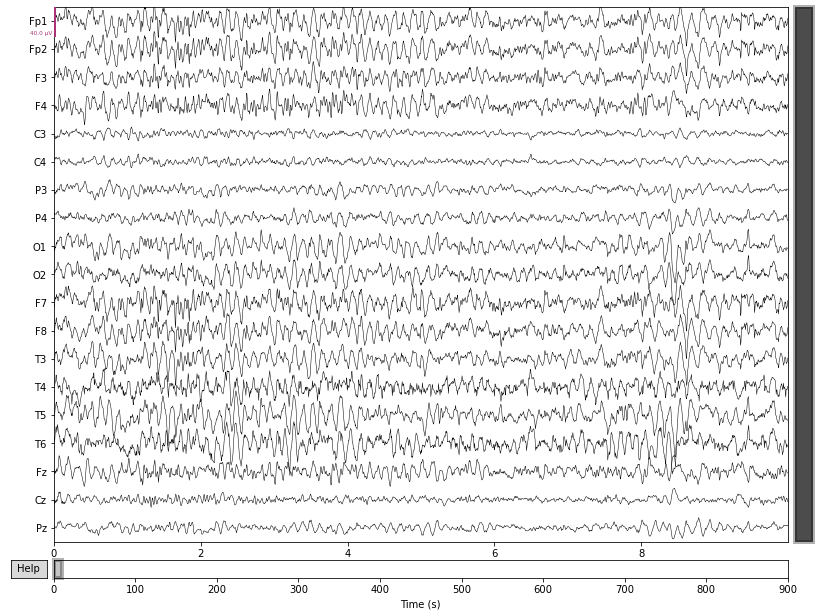

INFO: <Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 19 items (19 EEG)
 highpass: 0.0 Hz
 line_freq: 60
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 200.0 Hz
 subject_info: 4 items (dict)
> 
CHANNELS: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']


In [7]:
# This raw object is of the class mne.io.Raw, which is pretty powerful. Read through the documentation on this object to see
# what you can do. Below are some examples

# plotting
raw.plot()

# info
print(f"INFO: {raw.info} ")

# channels
print(f"CHANNELS: {raw.ch_names}")

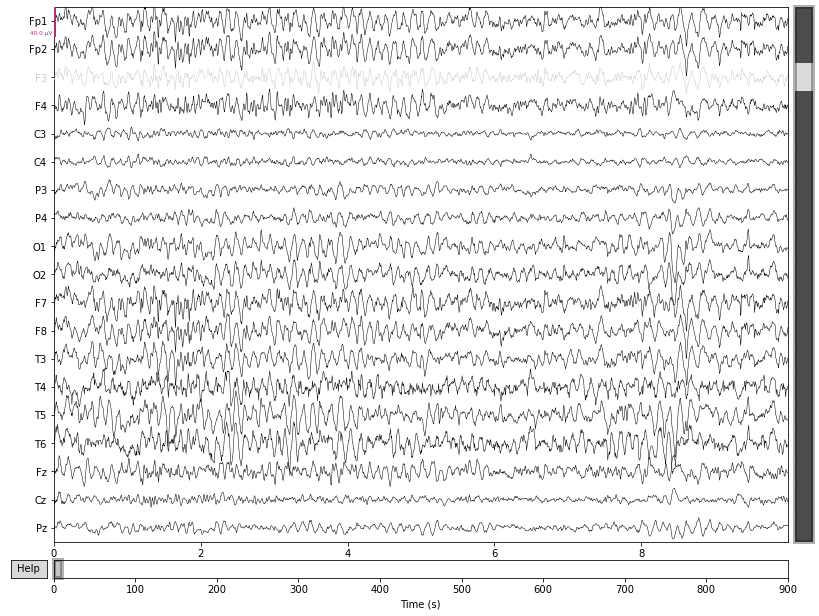

In [8]:
# Sometimes the raw data contains channels with bad signal. As you can see above, the info object has a field called bads which
# will help us deal with bad channels
raw.info["bads"] = ["F3"]
_ = raw.plot()

# notice how the channel annotated as bad is now greyed out

## 4. Plotting topographical maps

This is the one place where I feel mne's documentation to be a bit lackluster. Here is a simple example. When you are calculating your various statistic, it is sometimes nice to visualize it spatially. If you bin your data into time windows,
you can generate a sequence of these topographical maps and concatenate them into a gif to visualize the evolution of your data over time.

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


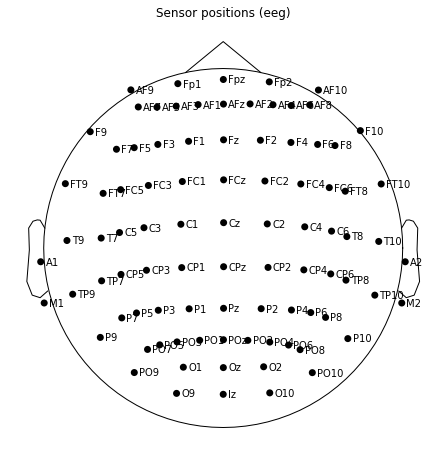

In [9]:
# Another helpful thing that mne provides is working with montages. This allows you to plot data on a skull topographical map. 

# first we create the montage
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

# we can plot this montage. Note that the montage will display the extended version, we will not be working with all the channels
_ = ten_twenty_montage.plot(kind='topomap', show_names=True)

In [10]:
# Let's start by creating a random distribution that would represent our score values
dist = np.random.randn(len(raw.ch_names), 1)

# So we can compare to the topomap, lets put the values into a dict
dist_dict = {}
for ind, ch in enumerate(raw.ch_names):
    dist_dict[ch] = dist[ind][0]
dist_dict

{'Fp1': -0.8907768014720902,
 'Fp2': -0.21267166872187301,
 'F3': 1.0166554218255708,
 'F4': -1.1860400130555933,
 'C3': -0.6021089451293377,
 'C4': 0.7429347123300301,
 'P3': -1.036290876513074,
 'P4': 0.9067435642372667,
 'O1': 0.9144732990825406,
 'O2': 0.7553307339719825,
 'F7': 0.010639128304125675,
 'F8': 0.5828793579479364,
 'T3': -1.172575155812255,
 'T4': -1.0759867655648214,
 'T5': -0.1467623131958444,
 'T6': 0.690231042021154,
 'Fz': 0.8208763987404605,
 'Cz': 0.7268835220721038,
 'Pz': 1.537694309567167}

In [13]:
# We need a fake info object to attach to this data
montage_chs = ten_twenty_montage.ch_names
fake_info = mne.create_info(ch_names=montage_chs, sfreq=250.,
                            ch_types='eeg')
fake_info = fake_info.pick_channels(raw.ch_names)
fake_info.set_montage(ten_twenty_montage)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, C3, Cz, C4, P3, Pz, P4, O1, O2, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
>

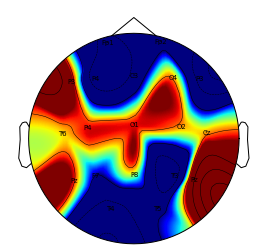

In [14]:
# With this setup we can now plot the topographical map
vmax = 1.0
im, cn = mne.viz.plot_topomap(dist.flatten(), fake_info, names=raw.ch_names, outlines='head', show_names=True,
                                      cmap="jet", show=False, axes=None, vmin=0.0, vmax=vmax)